In [1]:
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

import numpy as np
import importlib
import integralclient as ic
importlib.reload(ic)
ic.__file__
from astropy.time import Time
from astropy.coordinates import SkyCoord
import hashlib


hashstring = lambda x:hashlib.sha224(x.encode()).hexdigest()[:8]

T0_isot = "2023-11-15T15:36:21"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord.from_name("M82")
source_name = "GRB231115A"
src_coord

# ! pip install ddaclient>=1.1.6
import ddaclient

ddac = ddaclient.RemoteDDA(service_url="private=https://dda-interface-private.obsuks1.unige.ch,public=http://dda-interface-private.obsuks1.unige.ch", 
                           ddcache_root_local="/data/reduced/ddcache")
                        #    ddcache_root_local="/mnt/sshfs/lesta/projects/astro/integral/data/reduced/ddcache-public-usr_astro_in-p1"
         

modules = ['git://ddosa/staging-1-3',
           'git://findic/staging-1-3-icversion', 
           'git://ddosa11/staging-1-3', 
        #    'git://ddosa11/icversion-noisecontrol', 
           'git://gencat',
           'git://ddosa_delegate']


cat = ("SourceCatalog", 
           {
            "autoversion": True, 
            "catalog": [
                {"NAME":source_name, "RA": src_coord.ra.deg , "DEC":  src_coord.dec.deg}
            ]
           }
      )

bursts = [
    {
        "ijd": T0_ijd,
        "t1_rel_s": -0.3,
        "t2_rel_s": -0.2,
    }
]

for burst in bursts:
    rs = {}
    burst['image_results'] = rs
    
    #if '14:34:' not in burst['utc_integral']:
    #    print("skipping", burst['utc_integral'])
    #    continue
    
    # for dt_extra in 0,:
    for dt_extra in 0,0.1,0.05:
        burst_0_ijd = burst['ijd']
        dt1 = burst['t1_rel_s'] - dt_extra
        dt2 = burst['t2_rel_s'] + dt_extra

        print(dt1,dt2)

        #if burst['snr']<40:   
        #    continue

        burst['image_results'] = rs

        t1_utc = ic.converttime("IJD", 
                               burst_0_ijd + dt1/24/3600, 
                               "UTC")

        t2_utc = ic.converttime("IJD", 
                            burst_0_ijd + dt2/24/3600, 
                            "UTC")

        scw=ic.converttime("IJD", burst_0_ijd, "SCWID")

        try:
            r = ddac.query('ii_skyimage', 
                        modules=modules,
                        assume=[
                           'ddosa.ScWData(input_scwid="{}.000")'.format(scw),
                           'ddosa.ibis_gti(input_usergti=ddosa.gti_user)',
                           'ddosa11.BinEventsImage(use_NoisyDetFlag=0)',
                           'ddosa.UserGTI(use_gti=["{}", "{}"], use_version="{}")'.format(t1_utc,t2_utc, hashstring(t1_utc+t2_utc)),                
                       ],
                       prompt_delegate=True,
                       inject=[cat],
                       #callback="http://nourl?sessionid=testsession&jobid=testjob"
                    )
            rs[(dt1,dt2)] = r

        except Exception as e:
            print("exception", repr(e))
        
    #break


failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
failed to get AUTH with homefile due to: [Errno 2] No such file or directory: '/home/savchenk/.secret-client-user'


2023-11-15 23:38:01 v-think root[1000716] WARNING failed to get auth by any method: will not use auth


failed to get AUTH with env due to: 'K8S_SECRET_INTEGRAL_CLIENT_SECRET'
failed to get AUTH with homefile due to: [Errno 2] No such file or directory: '/home/savchenk/.secret-client-user'


2023-11-15 23:38:01 v-think root[1000716] INFO selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/
2023-11-15 23:38:01 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510403240718006/UTC


-0.3 -0.2


2023-11-15 23:38:02 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510414814783871/UTC
2023-11-15 23:38:02 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510437962933793/SCWID
2023-11-15 23:38:02 v-think ddaclient[1000716] INFO (('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://gencat,git://ddosa_delegate'), {})
2023-11-15 23:38:02 v-think ddaclient[1000716] INFO (('assume', 'ddosa.ScWData(input_scwid="270900370010.000"),ddosa.ibis_gti(input_usergti=ddosa.gti_user),ddosa11.BinEventsImage(use_NoisyDetFlag=0),ddosa.UserGTI(use_gti=["2023-11-15T15:36:20.699", "2023-11-15T15:36:20.799"], use_version="6a641036")'), {})
2023-11-15 23:38:02 v-think ddaclient[1000716] INFO (('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
2023-11-15 23:38:02 v-think d

-0.4 -0.1


2023-11-15 23:38:05 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510426388867927/UTC
2023-11-15 23:38:06 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510437962933793/SCWID
2023-11-15 23:38:06 v-think ddaclient[1000716] INFO (('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://gencat,git://ddosa_delegate'), {})
2023-11-15 23:38:06 v-think ddaclient[1000716] INFO (('assume', 'ddosa.ScWData(input_scwid="270900370010.000"),ddosa.ibis_gti(input_usergti=ddosa.gti_user),ddosa11.BinEventsImage(use_NoisyDetFlag=0),ddosa.UserGTI(use_gti=["2023-11-15T15:36:20.599", "2023-11-15T15:36:20.899"], use_version="76f6dc0f")'), {})
2023-11-15 23:38:06 v-think ddaclient[1000716] INFO (('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
2023-11-15 23:38:06 v-think d

-0.35 -0.15000000000000002


2023-11-15 23:38:09 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510420601825899/UTC
2023-11-15 23:38:10 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510437962933793/SCWID
2023-11-15 23:38:10 v-think ddaclient[1000716] INFO (('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://gencat,git://ddosa_delegate'), {})
2023-11-15 23:38:10 v-think ddaclient[1000716] INFO (('assume', 'ddosa.ScWData(input_scwid="270900370010.000"),ddosa.ibis_gti(input_usergti=ddosa.gti_user),ddosa11.BinEventsImage(use_NoisyDetFlag=0),ddosa.UserGTI(use_gti=["2023-11-15T15:36:20.649", "2023-11-15T15:36:20.849"], use_version="62fbb8d6")'), {})
2023-11-15 23:38:10 v-think ddaclient[1000716] INFO (('service url:', 'https://dda-interface-private.obsuks1.unige.ch'), {})
2023-11-15 23:38:10 v-think d

In [2]:
from astropy.io import fits

for k, v in burst['image_results'].items():
    t = fits.open(v.skyres)[2].data
    print(k, t['NAME'], t['DETSIG'])

(-0.3, -0.2) ['GRB231115A'] [4.607585]
(-0.4, -0.1) ['GRB231115A'] [4.2290983]
(-0.35, -0.15000000000000002) ['GRB231115A'] [4.08844]


Text(0.5, 1.0, 'ONTIME=0.19s')

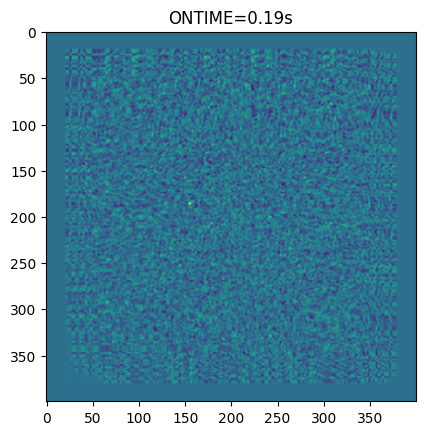

In [12]:
e = fits.open(v.skyima)[4]
plt.imshow(e.data)
plt.title(f"ONTIME={e.header['ONTIME']:.2f}s")

In [4]:
t0_ijd_integral = T0_ijd

#def evaluate_sumspec(scw, t1_utc, t2_utc, rebinfactor):
def evaluate_sumspec(t0, t1_rel_s, t2_rel_s, rebinfactor=4, scale="integral"):
    
    # if scale == "geo":    
    #     t0_geo_ijd = float(ic.converttime("ANY", t0, "IJD"))
    #     t0_geo_isot = ic.converttime("ANY", t0, "UTC")

    #     barycorr = ic.get_sc(t0_geo_isot, ra=src_coord.ra.deg, dec=src_coord.dec.deg)['barytime']    
    #     print(barycorr)    

    #     t0_ijd_integral = t0_geo_ijd - barycorr/24./3600.

    
    scw = ic.converttime("ANY", t0_ijd_integral, "SCWID")
    t1_utc = ic.converttime("IJD", t0_ijd_integral + t1_rel_s/24./3600,"UTC")
    t2_utc = ic.converttime("IJD", t0_ijd_integral + t2_rel_s/24./3600,"UTC")
        
    print(scw, t1_utc, t2_utc)
    
    modules = [
           'git://ddosa/staging-1-3',
           'git://findic/staging-1-3-icversion', 
           'git://ddosa11/staging-1-3', 
        #    'git://ddosa11/icversion-noisecontrol', 
           'git://gencat/staging-1-3',
           'git://useresponse/staging-1-3-osa11-pack',
           'git://process_isgri_spectra/staging-1-3-osa11',
           'git://ddosa_delegate',
              ]

    
    r = ddac.query('ISGRISpectraSum', 
                        modules=modules,
                        assume=[
                           #'ddosa.GRcat(use_userefcatvar=True, use_useresources=False)',            
                           'process_isgri_spectra.ScWSpectraList(input_scwlist=ddosa.IDScWList)',
                           'ddosa.IDScWList(use_scwid_list=["{}.000"])'.format(scw),                           
                           'ddosa.ibis_gti(input_usergti=ddosa.gti_user)',
                           'ddosa11.BinEventsSpectra(use_NoisyDetFlag=0)',
                           'ddosa.UserGTI(use_gti=["{}", "{}"], use_version="{}")'.format(t1_utc,t2_utc, hashstring(t1_utc+t2_utc)),
                           'useresponse.CompressEBins(use_factor={})'.format(rebinfactor),
                       ],
                       prompt_delegate=True,
                       inject=[cat],
                       #callback="http://nourl?sessionid=testsession&jobid=testjob"
                    )
    
    return r

for burst in bursts:
    print(burst['ijd'])

    sr = {}
    burst['specres']=sr

    for rb in 4,:
        try:
            sr[rb] = evaluate_sumspec(burst['ijd'], burst['t1_rel_s'], burst['t2_rel_s'], rb)
        except:
            raise


2023-11-15 23:38:37 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/ANY/8719.6510437962933793/SCWID


8719.651043796293


2023-11-15 23:38:37 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510403240718006/UTC
2023-11-15 23:38:37 v-think root[1000716] INFO url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//timesystem/api/v1.0/converttime/IJD/8719.6510414814783871/UTC
2023-11-15 23:38:38 v-think ddaclient[1000716] INFO (('modules', 'git://ddosa/staging-1-3,git://findic/staging-1-3-icversion,git://ddosa11/staging-1-3,git://gencat/staging-1-3,git://useresponse/staging-1-3-osa11-pack,git://process_isgri_spectra/staging-1-3-osa11,git://ddosa_delegate'), {})
2023-11-15 23:38:38 v-think ddaclient[1000716] INFO (('assume', 'process_isgri_spectra.ScWSpectraList(input_scwlist=ddosa.IDScWList),ddosa.IDScWList(use_scwid_list=["270900370010.000"]),ddosa.ibis_gti(input_usergti=ddosa.gti_user),ddosa11.BinEventsSpectra(use_NoisyDetFlag=0),ddosa.UserGTI(use_gti=["2023-11-15T15:36:20.699", "2023-11-15T15:36:20.799"], use_version

270900370010 2023-11-15T15:36:20.699 2023-11-15T15:36:20.799


2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO found result keys: ['assume', 'cached_path', 'data', 'exceptions', 'hashe', 'modules', 'result']
2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO ALL cached path: ['/data/reduced/ddcache/global/ISGRISpectraSum.v5.8.6.extractall//ed7f242d/']
 vs selected ['/data/reduced/ddcache/global/ISGRISpectraSum.v5.8.6.extractall//ed7f242d/']
2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO self.ddcache_root_local: /data/reduced/ddcache
2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO prepared selected_cached_path: global/ISGRISpectraSum.v5.8.6.extractall//ed7f242d
2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO cached object in /data/reduced/ddcache/global/ISGRISpectraSum.v5.8.6.extractall//ed7f242d/ => /data/reduced/ddcache/global/ISGRISpectraSum.v5.8.6.extractall//ed7f242d
2023-11-15 23:38:41 v-think DDAproduct[1000716] INFO jsonifiable data dumped to data_2023-11-15T23-38-41.json
2023-11-15 23:38:41 v-think DDAproduct[1000716